In [ ]:
import pandas as pd
import numpy as np

df_amd = pd.read_csv('building_type_accommodation.csv')

In [ ]:
# Drop object values
columns_to_drop = ['Timestamp','MeterKey', 'AmPmCode', 'FullTimeString24']

df_amd.drop(columns=columns_to_drop, inplace=True)
df_amd

,MeterReading,Day,Weekday,IsWeekend,IsHoliday,WeekOfMonth,WeekOfYear,Month,Quarter,Hour24,Hour12ShortString,Minute,HalfHour,ApparentTemperature,RelativeHumidity,CDD,HDD
0,4.672,1,2,0,1,1,1,1,1,0,0,15,0,16.0,86.0,0.697895,0.893684
1,5.281,1,2,0,1,1,1,1,1,0,0,30,1,16.0,87.0,0.697895,0.893684
2,4.609,1,2,0,1,1,1,1,1,0,0,45,1,16.2,87.0,0.697895,0.893684
3,4.984,1,2,0,1,1,1,1,1,1,1,0,0,16.7,87.0,0.697895,0.893684
4,5.078,1,2,0,1,1,1,1,1,1,1,15,0,16.4,87.0,0.697895,0.893684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34991,5.688,31,2,0,0,6,53,12,4,22,10,45,1,17.6,69.0,1.432292,0.692708
34992,6.062,31,2,0,0,6,53,12,4,23,11,0,0,17.3,70.0,1.432292,0.692708
34993,4.594,31,2,0,0,6,53,12,4,23,11,15,0,16.9,70.0,1.432292,0.692708
34994,4.906,31,2,0,0,6,53,12,4,23,11,30,1,16.5,68.0,1.432292,0.692708


# STANDARD

## Spliting Data

In [ ]:
# Use standard scaling from sklearn library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_amd)

StandardScaler()

In [ ]:
df_amd_scaled = scaler.transform(df_amd)
df_amd_scaled = pd.DataFrame(df_amd_scaled, columns=df_amd.columns)

In [ ]:
#Seperate the target variable and other variables
df_amd_y = df_amd_scaled['MeterReading']
df_amd_x = df_amd_scaled.drop('MeterReading', axis=1)

<Axes: >

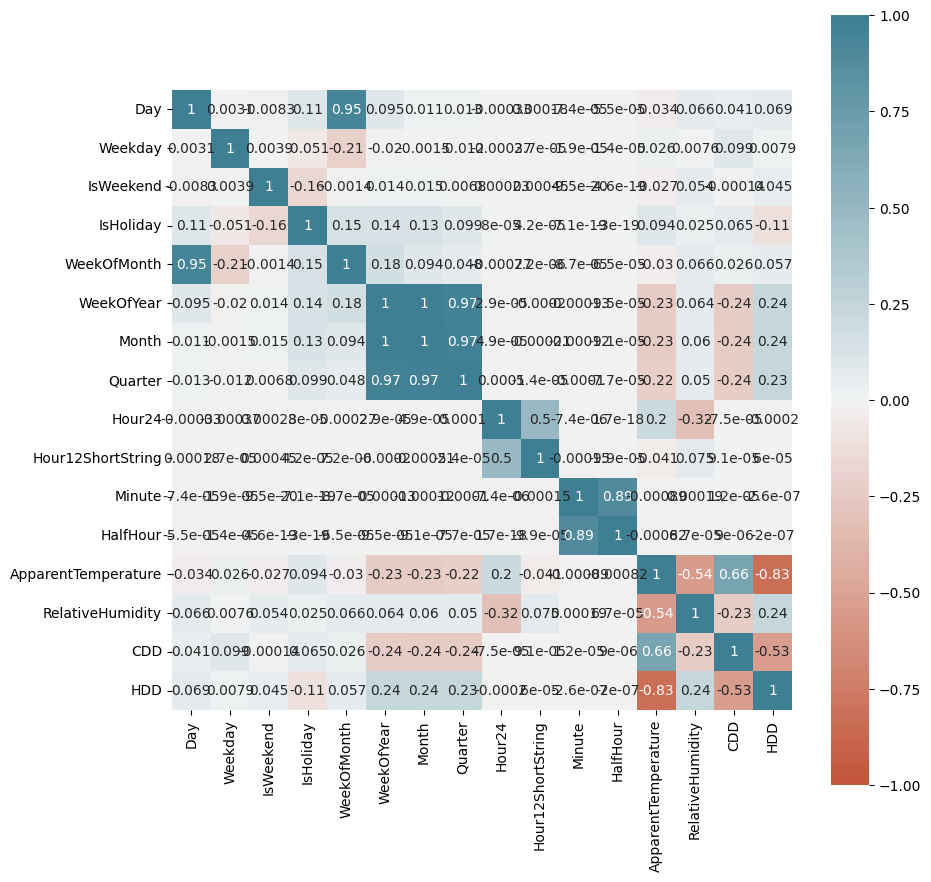

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation plot
plt.figure(figsize=(10, 10))
corr1 = df_amd_x.corr()
sns.heatmap(corr1, annot = True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

In [ ]:
#del df_amd_x['Hour12ShortString']

#del df_amd_x['HalfHour']
#del df_amd_x['Minute']
#del df_amd_x['Day']

In [ ]:
from sklearn.model_selection import train_test_split

df_amd_x_ta, df_amd_x_te, df_amd_y_ta, df_amd_y_te = train_test_split(df_amd_x, df_amd_y, test_size=0.3, random_state=, shuffle=False)

## Predictive Model - Standardization

In [ ]:
# STANDARD
# Predictive Analytics models
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np

reg_linear_amd = linear_model.LinearRegression()
reg_linear_amd.fit(df_amd_x_ta, df_amd_y_ta)

# Predict
df_amd_y_pred_linear = reg_linear_amd.predict(df_amd_x_te)

# Calculate the Mean Squared Error (RMSE) to evaluate the model's performance
error_linear_amd = np.sqrt(mean_squared_error(df_amd_y_pred_linear, df_amd_y_te))
print('Test Root Mean Squared Error (Linear Regression): ' + str(error_linear_amd))

# Calculate the Mean Absolute Error (MAE) to evaluate the model's performance
error_linear_amd_mae = mean_absolute_error(df_amd_y_pred_linear, df_amd_y_te)
print('Test Mean Absolute Error (Linear Regression): ' + str(error_linear_amd_mae))


Test Root Mean Squared Error (Linear Regression): 0.8600889916042672
Test Mean Absolute Error (Linear Regression): 0.6438045882772742


In [ ]:
# STANDARD
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

reg_tree_amd = DecisionTreeRegressor(random_state=0)
reg_tree_amd.fit(df_amd_x_ta, df_amd_y_ta)

# Predict
df_amd_y_pred_tree = reg_tree_amd.predict(df_amd_x_te)

# Calculate the Mean Squared Error (RMSE) to evaluate the model's performance
error_tree_amd = np.sqrt(mean_squared_error(df_amd_y_pred_tree, df_amd_y_te))
print('Test Root Mean Squared Error (Decision Tree Regression): ' + str(error_tree_amd))

# Calculate the Mean Absolute Error (MAE) to evaluate the model's performance
error_tree_amd_mae = mean_absolute_error(df_amd_y_pred_tree, df_amd_y_te)
print('Test Mean Absolute Error (Decision Tree Regression): ' + str(error_tree_amd_mae))

Test Root Mean Squared Error (Decision Tree Regression): 1.2213036080032862
Test Mean Absolute Error (Decision Tree Regression): 0.9644572544105271


In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_amd = MLPRegressor(hidden_layer_sizes=(60), max_iter=1000)
mlp_amd.fit(df_amd_x_ta, df_amd_y_ta)

# Predict
df_amd_y_pred_mlp = mlp_amd.predict(df_amd_x_te)

# Calculate the Mean Squared Error (RMSE) to evaluate the model's performance
mlp_amd = np.sqrt(mean_squared_error(df_amd_y_pred_mlp, df_amd_y_te))
print('Validation Root Mean Squared Error (MLP Regression): ' + str(mlp_amd))

# Calculate the Mean Absolute Error (MAE) to evaluate the model's performance
mlp_amd_mae = mean_absolute_error(df_amd_y_pred_mlp, df_amd_y_te)
print('Test Mean Absolute Error (MLP Regression): ' + str(mlp_amd_mae))

Validation Root Mean Squared Error (MLP Regression): 1.7410218951837813
Test Mean Absolute Error (MLP Regression): 1.348417760814094


In [ ]:
from xgboost import XGBRegressor

gbr_model_amd = XGBRegressor()
gbr_model_amd.fit(df_amd_x_ta, df_amd_y_ta)

# Predict
df_amd_y_pred_gbr = gbr_model_amd.predict(df_amd_x_te)

# Calculate the Mean Squared Error (RMSE) to evaluate the model's performance
error_gbr_te = np.sqrt(mean_squared_error(df_amd_y_pred_gbr, df_amd_y_te))
print('Validation Root Mean Squared Error (Gradient Boosting Regression): ' + str(error_gbr_te))

# Calculate the Mean Absolute Error (MAE) to evaluate the model's performance
error_gbr_te_mae = mean_absolute_error(df_amd_y_pred_gbr, df_amd_y_te)
print('Test Mean Absolute Error (Gradient Boosting Regression): ' + str(error_gbr_te_mae))

Validation Root Mean Squared Error (Gradient Boosting Regression): 1.2020857806385785
Test Mean Absolute Error (Gradient Boosting Regression): 0.9623943383230285


In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg_forest_amd = RandomForestRegressor(n_estimators=100, random_state=42)
reg_forest_amd.fit(df_amd_x_ta, df_amd_y_ta)

# Predict
df_amd_y_pred_forest = reg_forest_amd.predict(df_amd_x_te)

# Calculate the Mean Squared Error (RMSE) to evaluate the model's performance
error_forest_te = np.sqrt(mean_squared_error(df_amd_y_pred_forest, df_amd_y_te))
print('Validation Root Mean Squared Error (Random Forest): ' + str(error_forest_te))

# Calculate the Mean Absolute Error (MAE) to evaluate the model's performance
error_forest_te_mae = mean_absolute_error(df_amd_y_pred_forest, df_amd_y_te)
print('Test Mean Absolute Error (Gradient Boosting Regression): ' + str(error_forest_te_mae))

Validation Root Mean Squared Error (Random Forest): 1.1486448906794795
Test Mean Absolute Error (Gradient Boosting Regression): 0.9136035619837567


## Compare

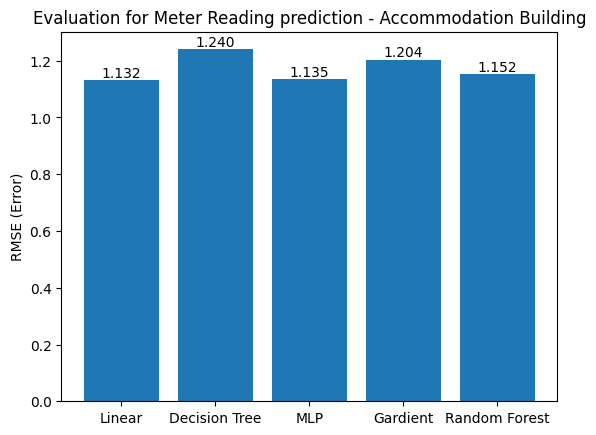

In [ ]:
#RMSE
models = ['Linear', 'Decision Tree', 'MLP', 'Gardient', 'Random Forest']
y_pos = np.arange(len(models))
performance = [error_linear_amd, error_tree_amd, mlp_amd, error_gbr_te, error_forest_te]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, models)
plt.ylabel('RMSE (Error)')
plt.title('Evaluation for Meter Reading prediction - Accommodation Building')

# Add value labels above each bar
for i, val in enumerate(performance):
    plt.text(i, val, f'{val:.3f}', ha='center', va='bottom')
plt.show()

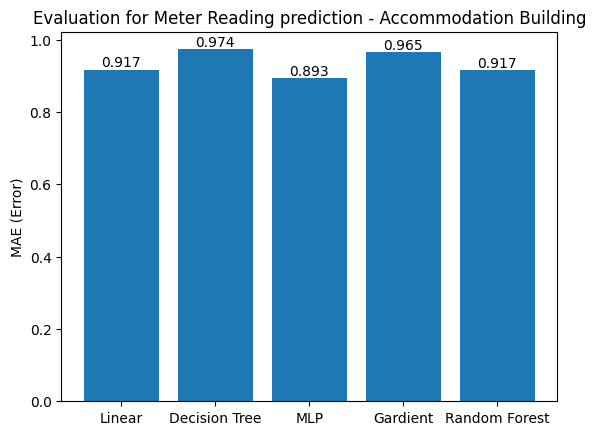

In [ ]:
# MAE
models = ['Linear', 'Decision Tree', 'MLP', 'Gardient', 'Random Forest']
y_pos = np.arange(len(models))
performance = [error_linear_amd_mae, error_tree_amd_mae, mlp_amd_mae, error_gbr_te_mae, error_forest_te_mae]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, models)
plt.ylabel('MAE (Error)')
plt.title('Evaluation for Meter Reading prediction - Accommodation Building')

# Add value labels above each bar
for i, val in enumerate(performance):
    plt.text(i, val, f'{val:.3f}', ha='center', va='bottom')
plt.show()

# TRANSFORMATION

## Spliting Data

<ipython-input-152-bc5d19010102>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sqrt_CDD_amd)


<Axes: xlabel='CDD', ylabel='Density'>

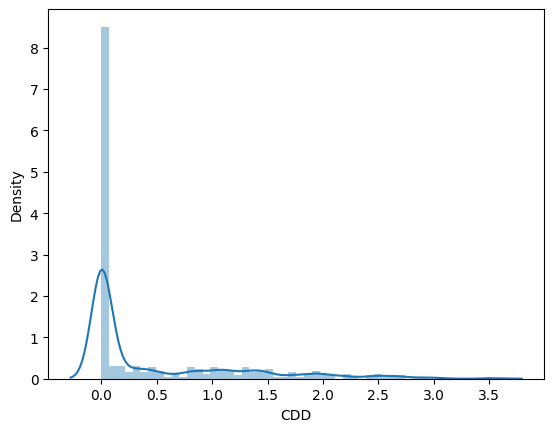

In [ ]:
from seaborn.external.kde import sqrt
import numpy as np
# Transformation.
CDD_var = df_amd['CDD']
sqrt_CDD_amd = np.sqrt(CDD_var)
sns.distplot(sqrt_CDD_amd)

In [ ]:
df_amd_test = df_amd.copy()
df_amd_test

,MeterReading,Day,Weekday,IsWeekend,IsHoliday,WeekOfMonth,WeekOfYear,Month,Quarter,Hour24,Hour12ShortString,Minute,HalfHour,ApparentTemperature,RelativeHumidity,CDD,HDD
0,4.672,1,2,0,1,1,1,1,1,0,0,15,0,16.0,86.0,0.697895,0.893684
1,5.281,1,2,0,1,1,1,1,1,0,0,30,1,16.0,87.0,0.697895,0.893684
2,4.609,1,2,0,1,1,1,1,1,0,0,45,1,16.2,87.0,0.697895,0.893684
3,4.984,1,2,0,1,1,1,1,1,1,1,0,0,16.7,87.0,0.697895,0.893684
4,5.078,1,2,0,1,1,1,1,1,1,1,15,0,16.4,87.0,0.697895,0.893684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34991,5.688,31,2,0,0,6,53,12,4,22,10,45,1,17.6,69.0,1.432292,0.692708
34992,6.062,31,2,0,0,6,53,12,4,23,11,0,0,17.3,70.0,1.432292,0.692708
34993,4.594,31,2,0,0,6,53,12,4,23,11,15,0,16.9,70.0,1.432292,0.692708
34994,4.906,31,2,0,0,6,53,12,4,23,11,30,1,16.5,68.0,1.432292,0.692708


In [ ]:
# create a new varaiable for sqrt
df_amd_test['sqrt_CDD'] = sqrt_CDD_amd

In [ ]:
# determine index for continouse variables
cts_vars_amd_1 = df_amd_test.dtypes[df_amd_test.dtypes != 'object'].index

# Calculate the skewness and then sort
skew_vars_amd_1 = df_amd_test[cts_vars_amd_1].skew().sort_values(ascending=False)
print(skew_vars_amd_1)

CDD                    3.071676
IsHoliday              2.798544
sqrt_CDD               1.632739
IsWeekend              0.956312
MeterReading           0.753475
ApparentTemperature    0.491542
HDD                    0.252681
Day                    0.005303
Weekday                0.003843
WeekOfYear             0.000714
Hour12ShortString      0.000144
Minute                 0.000000
HalfHour               0.000000
Hour24                -0.000422
WeekOfMonth           -0.001497
Month                 -0.010372
Quarter               -0.012703
RelativeHumidity      -0.246296
dtype: float64


In [ ]:
# determine index for continouse variables
cts_vars_amd_2 = df_amd_test.dtypes[df_amd_test.dtypes != 'object'].index

# Calculate the skewness and then sort
skew_vars_amd_2 = df_amd_test[cts_vars_amd_1].skew().sort_values(ascending=False)
print(skew_vars_amd_2)

CDD                    3.071676
IsHoliday              2.798544
sqrt_CDD               1.632739
IsWeekend              0.956312
MeterReading           0.753475
ApparentTemperature    0.491542
HDD                    0.252681
Day                    0.005303
Weekday                0.003843
WeekOfYear             0.000714
Hour12ShortString      0.000144
Minute                 0.000000
HalfHour               0.000000
Hour24                -0.000422
WeekOfMonth           -0.001497
Month                 -0.010372
Quarter               -0.012703
RelativeHumidity      -0.246296
dtype: float64


In [ ]:
del df_amd_test['CDD']
del df_amd_test['Hour12ShortString']

del df_amd_test['HalfHour']
del df_amd_test['Minute']


In [ ]:
#Seperate the target variable and other variables
df_amd_y_sqrt = df_amd_test['MeterReading']
df_amd_x_sqrt = df_amd_test.drop('MeterReading', axis=1)

<Axes: >

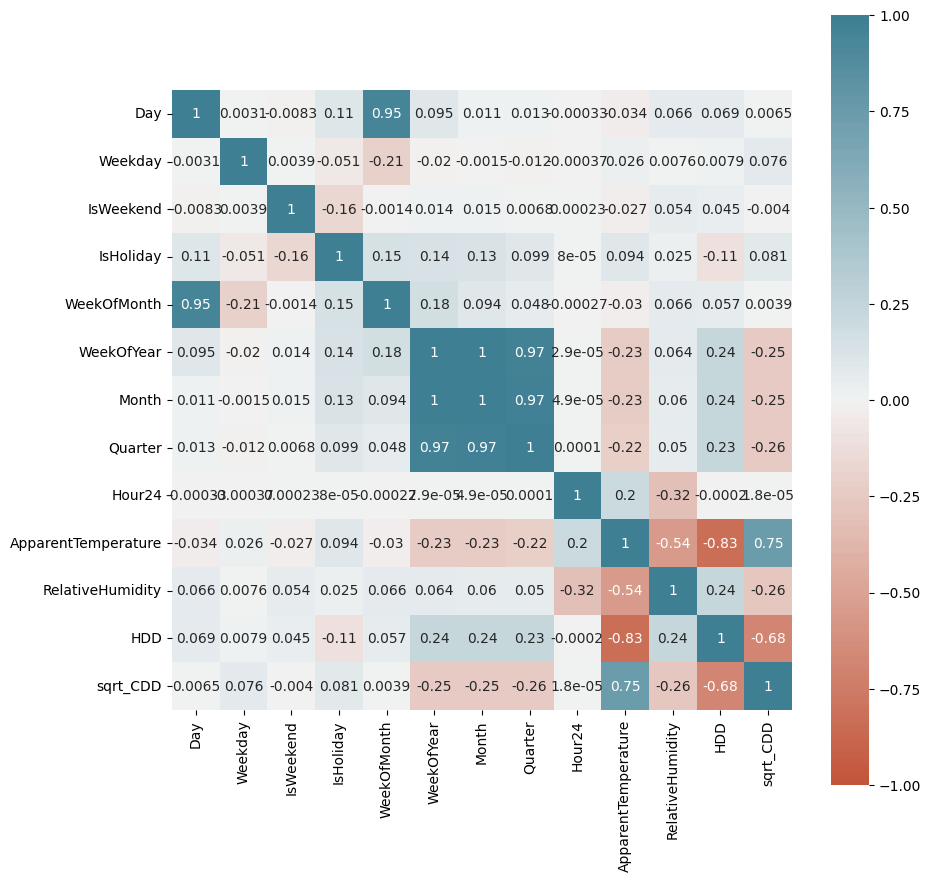

In [ ]:

# Correlation plot
plt.figure(figsize=(10, 10))
corr1 = df_amd_x_sqrt.corr()
sns.heatmap(corr1, annot = True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

In [ ]:

# Calculate the split index based on 60% for training
split_index_train_amd = int(0.8 * len(df_amd))
split_index_train_amd

In [ ]:
#Training data
df_amd_x_ta_sqrt = df_amd_x_sqrt.iloc[:split_index_train_amd]
df_amd_x_ta_sqrt

In [ ]:
#Training data
df_amd_y_ta_sqrt = df_amd_y_sqrt.iloc[:split_index_train_amd]
df_amd_y_ta_sqrt

In [ ]:
#Testing data
df_amd_x_te_sqrt = df_amd_x_sqrt.iloc[split_index_train_amd:]
df_amd_x_te_sqrt

In [ ]:
#Testing data
df_amd_y_te_sqrt = df_amd_y_sqrt.iloc[split_index_train_amd:]
df_amd_y_te_sqrt

## Predictive Model - Transformations

In [ ]:
# SQRT CDD
# Predictive Analytics models
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np

reg_linear_amd_sqrt = linear_model.LinearRegression()
reg_linear_amd_sqrt.fit(df_amd_x_ta_sqrt, df_amd_y_ta_sqrt)

# Predict
df_amd_y_pred_linear_sqrt = reg_linear_amd_sqrt.predict(df_amd_x_te_sqrt)

# Calculate the Mean Squared Error (RMSE) to evaluate the model's performance
error_linear_amd_sqrt = np.sqrt(mean_squared_error(df_amd_y_pred_linear_sqrt, df_amd_y_te_sqrt))
print('Test Root Mean Squared Error (Linear Regression): ' + str(error_linear_amd_sqrt))

# Calculate the Mean Absolute Error (MAE) to evaluate the model's performance
error_linear_amd_sqrt_mae = mean_absolute_error(df_amd_y_pred_linear_sqrt, df_amd_y_te_sqrt)
print('Test Mean Absolute Error (Linear Regression): ' + str(error_linear_amd_sqrt_mae))

Test Root Mean Squared Error (Linear Regression): 1.03060214872266
Test Mean Absolute Error (Linear Regression): 0.8332757661830357


In [ ]:
# SQRT CDD

# STANDARD
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

reg_tree_amd_sqrt = DecisionTreeRegressor(random_state=0)
reg_tree_amd_sqrt.fit(df_amd_x_ta_sqrt, df_amd_y_ta_sqrt)

# Predict
df_amd_y_pred_tree_sqrt = reg_tree_amd_sqrt.predict(df_amd_x_te_sqrt)

# Calculate the Mean Squared Error (RMSE) to evaluate the model's performance
error_tree_amd_sqrt = np.sqrt(mean_squared_error(df_amd_y_pred_tree_sqrt, df_amd_y_te_sqrt))
print('Test Root Mean Squared Error (Decision Tree Regression): ' + str(error_tree_amd_sqrt))

# Calculate the Mean Absolute Error (MAE) to evaluate the model's performance
error_tree_amd_sqrt_mae = mean_absolute_error(df_amd_y_pred_tree_sqrt, df_amd_y_te_sqrt)
print('Test Mean Absolute Error (Decision Tree Regression): ' + str(error_tree_amd_sqrt_mae))

Test Root Mean Squared Error (Decision Tree Regression): 1.11439018217097
Test Mean Absolute Error (Decision Tree Regression): 0.8803437142857142


In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_amd_sqrt = MLPRegressor(hidden_layer_sizes=(60), max_iter=1000)
mlp_amd_sqrt.fit(df_amd_x_ta_sqrt, df_amd_y_ta_sqrt)

# Predict
df_amd_y_pred_mlp_sqrt = mlp_amd_sqrt.predict(df_amd_x_te_sqrt)

# Calculate the Mean Squared Error (RMSE) to evaluate the model's performance
mlp_amd_sqrt = np.sqrt(mean_squared_error(df_amd_y_pred_mlp_sqrt, df_amd_y_te_sqrt))
print('Validation Root Mean Squared Error (MLP Regression): ' + str(mlp_amd_sqrt))

# Calculate the Mean Absolute Error (MAE) to evaluate the model's performance
mlp_amd_sqrt_mae = mean_absolute_error(df_amd_y_pred_mlp_sqrt, df_amd_y_te_sqrt)
print('Test Mean Absolute Error (MLP Regression): ' + str(mlp_amd_sqrt_mae))


Validation Root Mean Squared Error (MLP Regression): 1.1217982847756571
Test Mean Absolute Error (MLP Regression): 0.8983623031004044


In [ ]:
from xgboost import XGBRegressor

gbr_model_amd_sqrt = XGBRegressor()
gbr_model_amd_sqrt.fit(df_amd_x_ta_sqrt, df_amd_y_ta_sqrt)

# Predict
df_amd_y_pred_gbr_sqrt = gbr_model_amd_sqrt.predict(df_amd_x_te_sqrt)

# Calculate the Mean Squared Error (RMSE) to evaluate the model's performance
error_gbr_te_sqrt = np.sqrt(mean_squared_error(df_amd_y_pred_gbr_sqrt, df_amd_y_te_sqrt))
print('Validation Root Mean Squared Error (Gradient Boosting): ' + str(error_gbr_te_sqrt))

# Calculate the Mean Absolute Error (MAE) to evaluate the model's performance
error_gbr_te_sqrt_mae = mean_absolute_error(df_amd_y_pred_gbr_sqrt, df_amd_y_te_sqrt)
print('Test Mean Absolute Error (Gradient Boosting Regression): ' + str(error_gbr_te_sqrt_mae))

Validation Root Mean Squared Error (Gradient Boosting): 1.0409412171578607
Test Mean Absolute Error (Gradient Boosting Regression): 0.8293379431468418


In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg_forest_amd_sqrt = RandomForestRegressor(n_estimators=100, random_state=42)
reg_forest_amd_sqrt.fit(df_amd_x_ta_sqrt, df_amd_y_ta_sqrt)

# Predict
df_amd_y_pred_forest_sqrt = reg_forest_amd_sqrt.predict(df_amd_x_te_sqrt)

# Calculate the Mean Squared Error (RMSE) to evaluate the model's performance
error_forest_te_sqrt = np.sqrt(mean_squared_error(df_amd_y_pred_forest_sqrt, df_amd_y_te_sqrt))
print('Validation Root Mean Squared Error (Random Forest): ' + str(error_forest_te_sqrt))

# Calculate the Mean Absolute Error (MAE) to evaluate the model's performance
error_forest_te_sqrt_mae = mean_absolute_error(df_amd_y_pred_forest_sqrt, df_amd_y_te_sqrt)
print('Test Mean Absolute Error (Gradient Boosting Regression): ' + str(error_forest_te_sqrt_mae))

Validation Root Mean Squared Error (Random Forest): 1.0478414599656618
Test Mean Absolute Error (Gradient Boosting Regression): 0.8339785117069162


## Compare

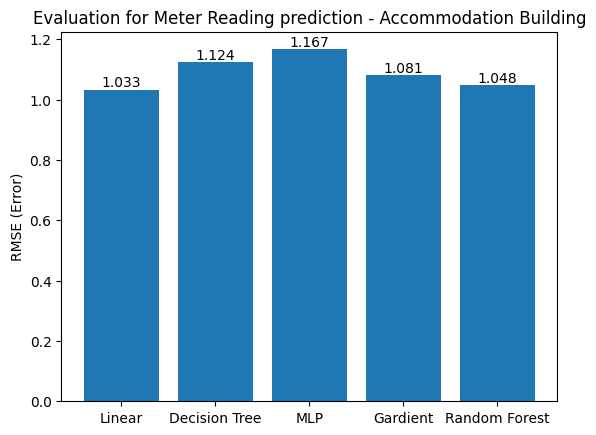

In [ ]:
#RMSE
models = ['Linear', 'Decision Tree', 'MLP', 'Gardient', 'Random Forest']
y_pos = np.arange(len(models))
performance = [error_linear_amd_sqrt, error_tree_amd_sqrt, mlp_amd_sqrt, error_gbr_te_sqrt, error_forest_te_sqrt]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, models)
plt.ylabel('RMSE (Error)')
plt.title('Evaluation for Meter Reading prediction - Accommodation Building')

# Add value labels above each bar
for i, val in enumerate(performance):
    plt.text(i, val, f'{val:.3f}', ha='center', va='bottom')
plt.show()

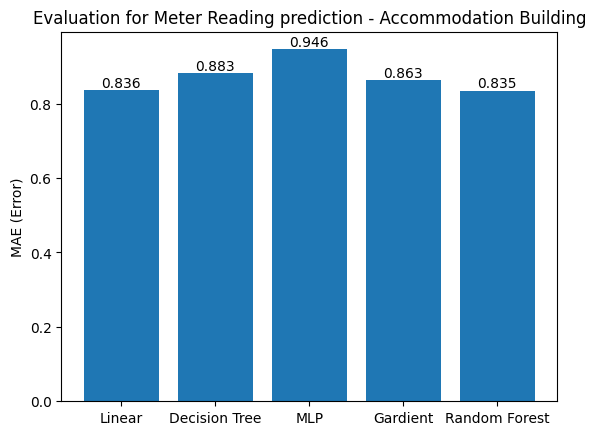

In [ ]:
# MAE
models = ['Linear', 'Decision Tree', 'MLP', 'Gardient', 'Random Forest']
y_pos = np.arange(len(models))
performance = [error_linear_amd_sqrt_mae, error_tree_amd_sqrt_mae, mlp_amd_sqrt_mae, error_gbr_te_sqrt_mae, error_forest_te_sqrt_mae]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, models)
plt.ylabel('MAE (Error)')
plt.title('Evaluation for Meter Reading prediction - Accommodation Building')

# Add value labels above each bar
for i, val in enumerate(performance):
    plt.text(i, val, f'{val:.3f}', ha='center', va='bottom')
plt.show()

# ESEMBLE APPROACH

## Stacking

### Ver1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import StackingRegressor

# Instantiate your individual regression models
linear_reg_amd_sd = LinearRegression()
decision_tree_reg_amd_sd = DecisionTreeRegressor()
mlp_reg_amd_sd = MLPRegressor()
gradient_boost_reg_amd_sd = GradientBoostingRegressor()
random_forest_reg_amd_sd = RandomForestRegressor()

# Create a list of tuples, where each tuple contains the name of the model and the model object
estimators_amd_sd = [
    ('linear_reg', linear_reg_amd_sd),
    ('decision_tree_reg', decision_tree_reg_amd_sd),
    ('mlp_reg', mlp_reg_amd_sd),
    ('gradient_boost_reg', gradient_boost_reg_amd_sd),
    ('random_forest_reg', random_forest_reg_amd_sd)
]

# Create a StackingRegressor with the individual models and a meta-regressor (e.g., LinearRegression)
stacking_regressor_amd_sd = StackingRegressor(
    estimators=estimators_amd_sd,
    final_estimator=LinearRegression()  # You can choose a different meta-regressor if desired
)

# Fit the stacking ensemble to your training data
stacking_regressor_amd_sd.fit(df_amd_x_ta, df_amd_y_ta)

# Make predictions using the stacking ensemble model
ensemble_predictions_amd_sd = stacking_regressor_amd_sd.predict(df_amd_x_te)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE)
rmse_amd_stacking_sd = np.sqrt(mean_squared_error(df_amd_y_te, ensemble_predictions_amd_sd))

print('Root Mean Squared Error (Stacking Approach): ' + str(rmse_amd_stacking_sd))
# Calculate the Mean Absolute Error (MAE)
mae_amd_sd = mean_absolute_error(df_amd_y_te, ensemble_predictions_amd_sd)

print(f"MAE for Stacking Ensemble Model: {mae_amd_sd}")

Root Mean Squared Error (Stacking Approach): 1.1531370395297993
MAE for Stacking Ensemble Model: 0.9403665619774727


### Ver2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor

# Instantiate your individual regression models
linear_reg_amd_sd = LinearRegression()
mlp_reg_amd_sd = MLPRegressor()

# Create a list of tuples, where each tuple contains the name of the model and the model object
estimators_amd_sd_2 = [
    ('linear_reg', linear_reg_amd_sd),
    ('mlp_reg', mlp_reg_amd_sd)
]

# Create a StackingRegressor with the individual models and a meta-regressor (e.g., LinearRegression)
stacking_regressor_amd_sd_2 = StackingRegressor(
    estimators=estimators_amd_sd_2,
    final_estimator=LinearRegression()  # You can choose a different meta-regressor if desired
)

# Fit the stacking ensemble to your training data
stacking_regressor_amd_sd_2.fit(df_amd_x_ta, df_amd_y_ta)

# Make predictions using the stacking ensemble model
ensemble_predictions_amd_sd_2 = stacking_regressor_amd_sd_2.predict(df_amd_x_te)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE)
rmse_amd_stacking_sd_2 = np.sqrt(mean_squared_error(df_amd_y_te, ensemble_predictions_amd_sd_2))

print('Root Mean Squared Error (Stacking Approach): ' + str(rmse_amd_stacking_sd_2))

from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error (MAE)
mae_amd_sd_2 = mean_absolute_error(df_amd_y_te, ensemble_predictions_amd_sd_2)

print(f"MAE for Stacking Ensemble Model: {mae_amd_sd_2}")

Root Mean Squared Error (Stacking Approach): 1.0828738091487755
MAE for Stacking Ensemble Model: 0.8705811176626422


## Ver2'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor

# Instantiate your individual regression models
linear_reg_amd_sd = LinearRegression()
mlp_reg_amd_sd = MLPRegressor()

# Create a list of tuples, where each tuple contains the name of the model and the model object
estimators_amd_sd_2_1 = [
    ('linear_reg', linear_reg_amd_sd),
    ('mlp_reg', mlp_reg_amd_sd)
]

# Create a StackingRegressor with the individual models and a meta-regressor (e.g., LinearRegression)
stacking_regressor_amd_sd_2_1 = StackingRegressor(
    estimators=estimators_amd_sd_2_1,
    final_estimator=MLPRegressor()  # You can choose a different meta-regressor if desired
)

# Fit the stacking ensemble to your training data
stacking_regressor_amd_sd_2_1.fit(df_amd_x_ta, df_amd_y_ta)

# Make predictions using the stacking ensemble model
ensemble_predictions_amd_sd_2_1 = stacking_regressor_amd_sd_2_1.predict(df_amd_x_te)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE)
rmse_amd_stacking_sd_2_1 = np.sqrt(mean_squared_error(df_amd_y_te, ensemble_predictions_amd_sd_2_1))

print('Root Mean Squared Error (Stacking Approach): ' + str(rmse_amd_stacking_sd_2_1))

from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error (MAE)
mae_amd_sd_2_1 = mean_absolute_error(df_amd_y_te, ensemble_predictions_amd_sd_2_1)

print(f"MAE for Stacking Ensemble Model: {mae_amd_sd_2_1}")

### Ver3

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import StackingRegressor

# Instantiate your individual regression models
linear_reg_amd_sd = LinearRegression()
random_forest_reg_amd_sd = RandomForestRegressor()

# Create a list of tuples, where each tuple contains the name of the model and the model object
estimators_amd_sd = [
    ('linear_reg', linear_reg_amd_sd),
    ('random_forest_reg', random_forest_reg_amd_sd)
]

# Create a StackingRegressor with the individual models and a meta-regressor (e.g., LinearRegression)
stacking_regressor_amd_sd_3 = StackingRegressor(
    estimators=estimators_amd_sd,
    final_estimator=RandomForestRegressor()  # You can choose a different meta-regressor if desired
)

# Fit the stacking ensemble to your training data
stacking_regressor_amd_sd_3.fit(df_amd_x_ta, df_amd_y_ta)

# Make predictions using the stacking ensemble model
ensemble_predictions_amd_sd_3 = stacking_regressor_amd_sd_3.predict(df_amd_x_te)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE)
rmse_amd_stacking_sd_3 = np.sqrt(mean_squared_error(df_amd_y_te, ensemble_predictions_amd_sd_3))

print('Root Mean Squared Error (Stacking Approach): ' + str(rmse_amd_stacking_sd_3))

from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error (MAE)
mae_amd_sd_3 = mean_absolute_error(df_amd_y_te, ensemble_predictions_amd_sd_3)

print(f"MAE for Stacking Ensemble Model: {mae_amd_sd_3}")

Root Mean Squared Error (Stacking Approach): 1.1341095138896928
MAE for Stacking Ensemble Model: 0.8952225811624057


### Ver4

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

# Instantiate your individual regression models
linear_reg_amd_sd = LinearRegression()
mlp_reg_amd_sd = MLPRegressor()
random_forest_reg_amd_sd = RandomForestRegressor()

# Create a list of tuples, where each tuple contains the name of the model and the model object
estimators_amd_sd_4 = [
    ('linear_reg', linear_reg_amd_sd),
    ('mlp_reg', mlp_reg_amd_sd),
    ('random_forest_reg', random_forest_reg_amd_sd)
]

# Create a StackingRegressor with the individual models and a meta-regressor (e.g., LinearRegression)
stacking_regressor_amd_sd_4 = StackingRegressor(
    estimators=estimators_amd_sd_4,
    final_estimator=LinearRegression()  # You can choose a different meta-regressor if desired
)

# Fit the stacking ensemble to your training data
stacking_regressor_amd_sd_4.fit(df_amd_x_ta, df_amd_y_ta)

# Make predictions using the stacking ensemble model
ensemble_predictions_amd_sd_4 = stacking_regressor_amd_sd_4.predict(df_amd_x_te)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE)
rmse_amd_stacking_sd_4 = np.sqrt(mean_squared_error(df_amd_y_te, ensemble_predictions_amd_sd_4))

print('Root Mean Squared Error (Stacking Approach): ' + str(rmse_amd_stacking_sd_4))

from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error (MAE)
mae_amd_sd_4 = mean_absolute_error(df_amd_y_te, ensemble_predictions_amd_sd_4)

print(f"MAE for Stacking Ensemble Model: {mae_amd_sd_4}")

Root Mean Squared Error (Stacking Approach): 1.0509102139240536
MAE for Stacking Ensemble Model: 0.8379991426779313


## Voting

### Ver1

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate your individual models
linear_reg_amd_sd = LinearRegression()
decision_tree_reg_amd_sd = DecisionTreeRegressor()
mlp_reg_amd_sd = MLPRegressor()
gradient_boost_reg_amd_sd = GradientBoostingRegressor()
random_forest_reg_amd_sd = RandomForestRegressor()

# Create a VotingRegressor with the individual models
voting_regressor = VotingRegressor(estimators=[
    ('linear_reg', linear_reg_amd_sd),
    ('decision_tree_reg', decision_tree_reg_amd_sd),
    ('mlp_reg', mlp_reg_amd_sd),
    ('gradient_boost_reg', gradient_boost_reg_amd_sd),
    ('random_forest_reg', random_forest_reg_amd_sd)
])

# Fit the ensemble model to your training data
voting_regressor.fit(df_amd_x_ta, df_amd_y_ta)

# Make predictions using the ensemble model
ensemble_predictions = voting_regressor.predict(df_amd_x_te)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE)
rmse_amd_voting_sd = np.sqrt(mean_squared_error(df_amd_y_te, ensemble_predictions))

print('Root Mean Squared Error (Voting Approach): ' + str(rmse_amd_voting_sd))

# Calculate the Mean Absolute Error (MAE)
mae_amd_sd = mean_absolute_error(df_amd_y_te, ensemble_predictions_amd_sd_3)

print(f"MAE for Stacking Ensemble Model: {mae_amd_sd_3}")

Root Mean Squared Error (Voting Approach): 1.1122818291580217


### Ver2

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Instantiate your individual models
linear_reg_amd_sd = LinearRegression()
random_forest_reg_amd_sd = RandomForestRegressor()

# Create a VotingRegressor with the individual models
voting_regressor_2 = VotingRegressor(estimators=[
    ('linear_reg', linear_reg_amd_sd),
    ('random_forest_reg', random_forest_reg_amd_sd)
])

# Fit the ensemble model to your training data
voting_regressor_2.fit(df_amd_x_ta, df_amd_y_ta)

# Make predictions using the ensemble model
ensemble_predictions_2 = voting_regressor_2.predict(df_amd_x_te)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE)
rmse_amd_voting_sd_2 = np.sqrt(mean_squared_error(df_amd_y_te, ensemble_predictions_2))

print('Root Mean Squared Error (Voting Approach): ' + str(rmse_amd_voting_sd_2))

# Calculate the Mean Absolute Error (MAE)
mae_amd_sd_3 = mean_absolute_error(df_amd_y_te, ensemble_predictions_amd_sd_3)

print(f"MAE for Stacking Ensemble Model: {mae_amd_sd_3}")

Root Mean Squared Error (Voting Approach): 1.0951905575461602
